## Importação das bibliotecas

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_theme(style="darkgrid")

## Importação e Visualização da base de dados

In [4]:
df_null = pd.read_csv('df_null.csv', sep=';', encoding='iso-8859-1')
df_null.head()

,NU_INSCRICAO,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,NO_MUNICIPIO_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,IDIOMA,STATUS DA REDAÇÃO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,RENDA,INTERNET,PRESENCA,NOTAS
0,210051567969,18 anos,M,Preta,Estou cursando e concluirei o EM em 2021,Público,Urbana,Caruaru,1,1,1,1,554.2,524.7,456.4,649.5,Inglês,Sem problemas,120.0,120.0,120.0,140.0,140.0,640.0,"Até R$ 998,00",Sim,4,2824.8
1,210054292437,18 anos,M,Branca,Estou cursando e concluirei o EM em 2021,Público,Não Consta,Brejo da Madre de Deus,0,1,1,0,NaN,453.8,421.4,NaN,Inglês,Sem problemas,80.0,120.0,80.0,140.0,120.0,540.0,"Até R$ 998,00",Sim,2,1415.2
2,210051340033,18 anos,F,Parda,Estou cursando e concluirei o EM em 2021,Público,Urbana,Salgueiro,1,1,1,1,410.5,498.3,459.2,606.0,Espanhol,Sem problemas,120.0,120.0,120.0,120.0,20.0,500.0,"De R$ 1.497,01 até R$ 1.996,00",Sim,4,2474.0
3,210051891394,19 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,Caruaru,1,1,1,1,400.9,480.8,458.0,472.0,Espanhol,Sem problemas,120.0,120.0,120.0,120.0,100.0,580.0,"De R$ 2.994,01 até R$ 3.992,00",Sim,4,2391.7
4,210053720446,Entre 31 e 35 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,Jaboatão dos Guararapes,1,1,1,1,552.0,595.1,541.9,446.9,Espanhol,Sem problemas,120.0,120.0,120.0,120.0,60.0,540.0,"De R$ 1.497,01 até R$ 1.996,00",Sim,4,2675.9


In [5]:
df_knn = pd.read_csv('df_knn.csv', sep=';', encoding='ISO-8859-1')
df_knn.head()

,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO
0,554.200000,524.7,456.4,649.500000,120.0,120.0,120.0,140.0,140.0,640.0
1,405.269967,453.8,421.4,482.724891,80.0,120.0,80.0,140.0,120.0,540.0
2,410.500000,498.3,459.2,606.000000,120.0,120.0,120.0,120.0,20.0,500.0
3,400.900000,480.8,458.0,472.000000,120.0,120.0,120.0,120.0,100.0,580.0
4,552.000000,595.1,541.9,446.900000,120.0,120.0,120.0,120.0,60.0,540.0


## Tratamento e Limpeza de Dados

In [6]:
df_null.drop(columns=['NU_INSCRICAO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1', 'NOTA_COMP2','NOTA_COMP3', 'NOTA_COMP4', 'NOTA_COMP5', 'NOTA_REDACAO'],inplace=True)
df_null.head()

,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,NO_MUNICIPIO_PROVA,IDIOMA,STATUS DA REDAÇÃO,RENDA,INTERNET,PRESENCA,NOTAS
0,18 anos,M,Preta,Estou cursando e concluirei o EM em 2021,Público,Urbana,Caruaru,Inglês,Sem problemas,"Até R$ 998,00",Sim,4,2824.8
1,18 anos,M,Branca,Estou cursando e concluirei o EM em 2021,Público,Não Consta,Brejo da Madre de Deus,Inglês,Sem problemas,"Até R$ 998,00",Sim,2,1415.2
2,18 anos,F,Parda,Estou cursando e concluirei o EM em 2021,Público,Urbana,Salgueiro,Espanhol,Sem problemas,"De R$ 1.497,01 até R$ 1.996,00",Sim,4,2474.0
3,19 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,Caruaru,Espanhol,Sem problemas,"De R$ 2.994,01 até R$ 3.992,00",Sim,4,2391.7
4,Entre 31 e 35 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,Jaboatão dos Guararapes,Espanhol,Sem problemas,"De R$ 1.497,01 até R$ 1.996,00",Sim,4,2675.9


### Concatenando as duas bases de dados:
- Base de Dados 1 -> Referente às informações gerais dos vestibulandos
- Base de Dados 2 -> Referente às notas dos vestibulandos

In [7]:
df = pd.concat([df_null, df_knn], axis=1)
df.head()

,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,NO_MUNICIPIO_PROVA,IDIOMA,STATUS DA REDAÇÃO,RENDA,INTERNET,PRESENCA,NOTAS,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO
0,18 anos,M,Preta,Estou cursando e concluirei o EM em 2021,Público,Urbana,Caruaru,Inglês,Sem problemas,"Até R$ 998,00",Sim,4,2824.8,554.200000,524.7,456.4,649.500000,120.0,120.0,120.0,140.0,140.0,640.0
1,18 anos,M,Branca,Estou cursando e concluirei o EM em 2021,Público,Não Consta,Brejo da Madre de Deus,Inglês,Sem problemas,"Até R$ 998,00",Sim,2,1415.2,405.269967,453.8,421.4,482.724891,80.0,120.0,80.0,140.0,120.0,540.0
2,18 anos,F,Parda,Estou cursando e concluirei o EM em 2021,Público,Urbana,Salgueiro,Espanhol,Sem problemas,"De R$ 1.497,01 até R$ 1.996,00",Sim,4,2474.0,410.500000,498.3,459.2,606.000000,120.0,120.0,120.0,120.0,20.0,500.0
3,19 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,Caruaru,Espanhol,Sem problemas,"De R$ 2.994,01 até R$ 3.992,00",Sim,4,2391.7,400.900000,480.8,458.0,472.000000,120.0,120.0,120.0,120.0,100.0,580.0
4,Entre 31 e 35 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,Jaboatão dos Guararapes,Espanhol,Sem problemas,"De R$ 1.497,01 até R$ 1.996,00",Sim,4,2675.9,552.000000,595.1,541.9,446.900000,120.0,120.0,120.0,120.0,60.0,540.0


### Reordenando as posições das colunas

In [8]:
df = df[['FAIXA ETÁRIA', 'SEXO', 'COR/RAÇA', 'SITUAÇÃO DE CONCLUSÃO', 'TIPO DE ESCOLA', 'LOCALIZAÇÃO DA ESCOLA', 'NO_MUNICIPIO_PROVA', 'IDIOMA', 'STATUS DA REDAÇÃO', 'RENDA', 'INTERNET',
       'NOTA_CN', 'NOTA_MT', 'NOTA_CH', 'NOTA_LC', 'NOTA_COMP1', 'NOTA_COMP2', 'NOTA_COMP3', 'NOTA_COMP4', 'NOTA_COMP5', 'NOTA_REDACAO', 'NOTAS', 'PRESENCA']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5038 entries, 0 to 5037
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FAIXA ETÁRIA           5038 non-null   object 
 1   SEXO                   5038 non-null   object 
 2   COR/RAÇA               5038 non-null   object 
 3   SITUAÇÃO DE CONCLUSÃO  5038 non-null   object 
 4   TIPO DE ESCOLA         5038 non-null   object 
 5   LOCALIZAÇÃO DA ESCOLA  5038 non-null   object 
 6   NO_MUNICIPIO_PROVA     5038 non-null   object 
 7   IDIOMA                 5038 non-null   object 
 8   STATUS DA REDAÇÃO      5038 non-null   object 
 9   RENDA                  5038 non-null   object 
 10  INTERNET               5038 non-null   object 
 11  NOTA_CN                5038 non-null   float64
 12  NOTA_MT                5038 non-null   float64
 13  NOTA_CH                5038 non-null   float64
 14  NOTA_LC                5038 non-null   float64
 15  NOTA

### Verificação final da existência dos valores ausentes

In [10]:
df.isnull().sum()

FAIXA ETÁRIA             0
SEXO                     0
COR/RAÇA                 0
SITUAÇÃO DE CONCLUSÃO    0
TIPO DE ESCOLA           0
LOCALIZAÇÃO DA ESCOLA    0
NO_MUNICIPIO_PROVA       0
IDIOMA                   0
STATUS DA REDAÇÃO        0
RENDA                    0
INTERNET                 0
NOTA_CN                  0
NOTA_MT                  0
NOTA_CH                  0
NOTA_LC                  0
NOTA_COMP1               0
NOTA_COMP2               0
NOTA_COMP3               0
NOTA_COMP4               0
NOTA_COMP5               0
NOTA_REDACAO             0
NOTAS                    0
PRESENCA                 0
dtype: int64

#### A partir desse momento, tem-se uma base de dados sem nenhuma valor ausente e pronta para ser analisada.

# Análise Exploratória dos Dados

In [11]:
df.describe()

,NOTA_CN,NOTA_MT,NOTA_CH,NOTA_LC,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,NOTAS,PRESENCA
count,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.00000,5038.000000,5038.000000
mean,482.295508,524.468547,508.989831,492.442692,117.648698,139.869481,115.462530,128.174815,115.418596,616.57412,2578.082771,3.906312
std,77.230596,107.256564,96.021467,78.897466,34.539284,46.483088,37.321705,39.929524,59.494668,193.76855,518.062525,0.431944
min,0.000000,354.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,330.100000,2.000000
25%,424.325000,438.125000,435.700000,438.325000,100.000000,120.000000,100.000000,120.000000,80.000000,520.00000,2279.000000,4.000000
50%,470.650000,500.350000,506.750000,495.100000,120.000000,120.000000,120.000000,120.000000,120.000000,600.00000,2567.550000,4.000000
75%,531.575000,596.900000,577.675000,546.350000,140.000000,180.000000,140.000000,160.000000,160.000000,740.00000,2905.975000,4.000000
max,778.600000,953.100000,832.500000,740.300000,200.000000,200.000000,200.000000,200.000000,200.000000,980.00000,4167.200000,6.000000


## Análise Unidimensional
- Objetivo: Entender como cada variável da base de dados se comporta.

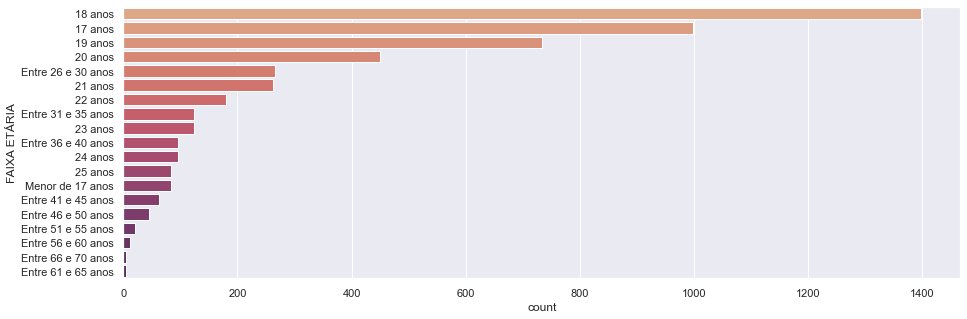

In [43]:
# Distribuicao da faixa etaria da nossa base de dados
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(y = 'FAIXA ETÁRIA',
                   data = df,
                   order = df['FAIXA ETÁRIA'].value_counts().index,
                   palette = 'flare')

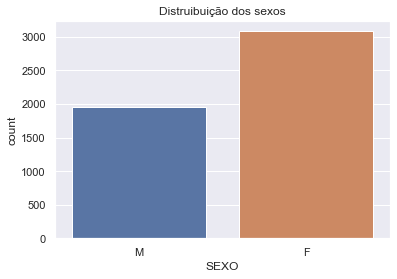

In [46]:
# Distribuicao dos sexos
ax = sns.countplot(x = 'SEXO',
                  data = df)
ax.set_title('Distruibuição dos sexos');

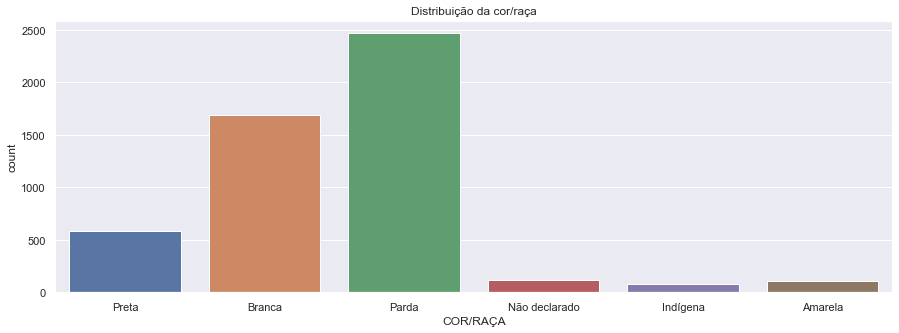

In [68]:
# Distribuicao da cor/raca
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = 'COR/RAÇA', data = df)
ax.set_title('Distribuição da cor/raça');

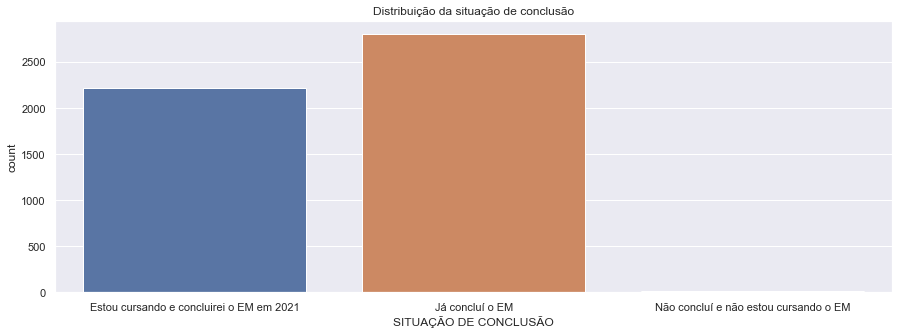

In [83]:
# Distribuicao da situacao de conclusao
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = 'SITUAÇÃO DE CONCLUSÃO', data = df)
ax.set_title('Distribuição da situação de conclusão');

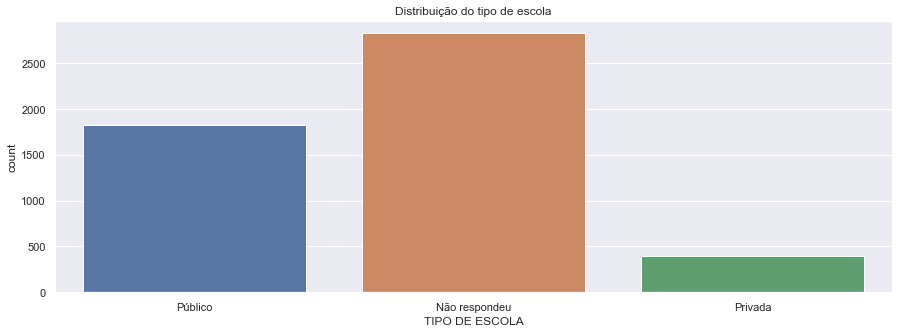

In [84]:
# Distribuicao do tipo de escola
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = 'TIPO DE ESCOLA', data = df)
ax.set_title('Distribuição do tipo de escola');

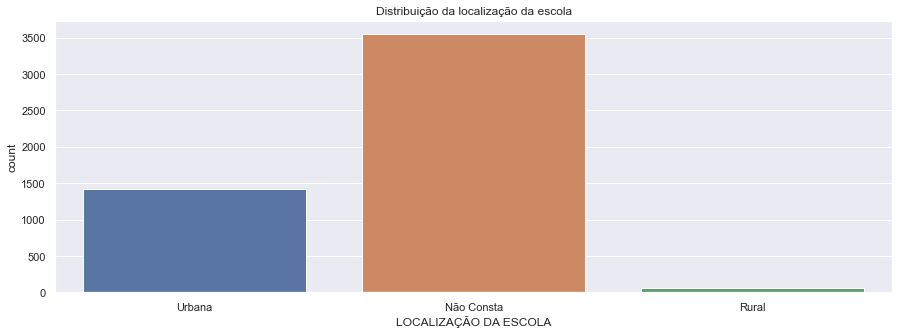

In [86]:
# Distribuicao da localizacao da escola
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = 'LOCALIZAÇÃO DA ESCOLA', data = df)
ax.set_title('Distribuição da localização da escola');

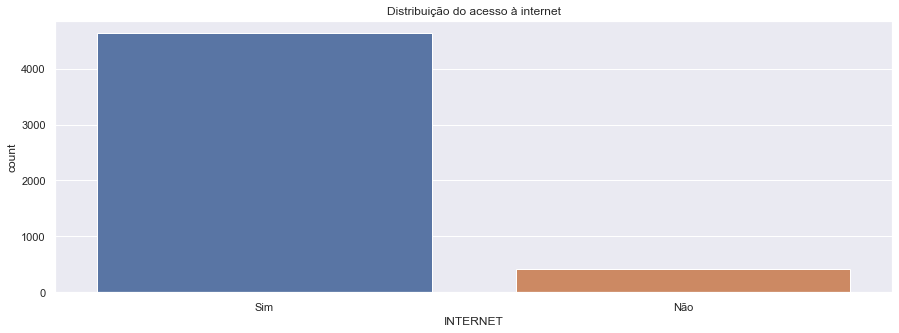

In [88]:
# Distribuicao do acesso a internet
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = 'INTERNET', data = df)
ax.set_title('Distribuição do acesso à internet');

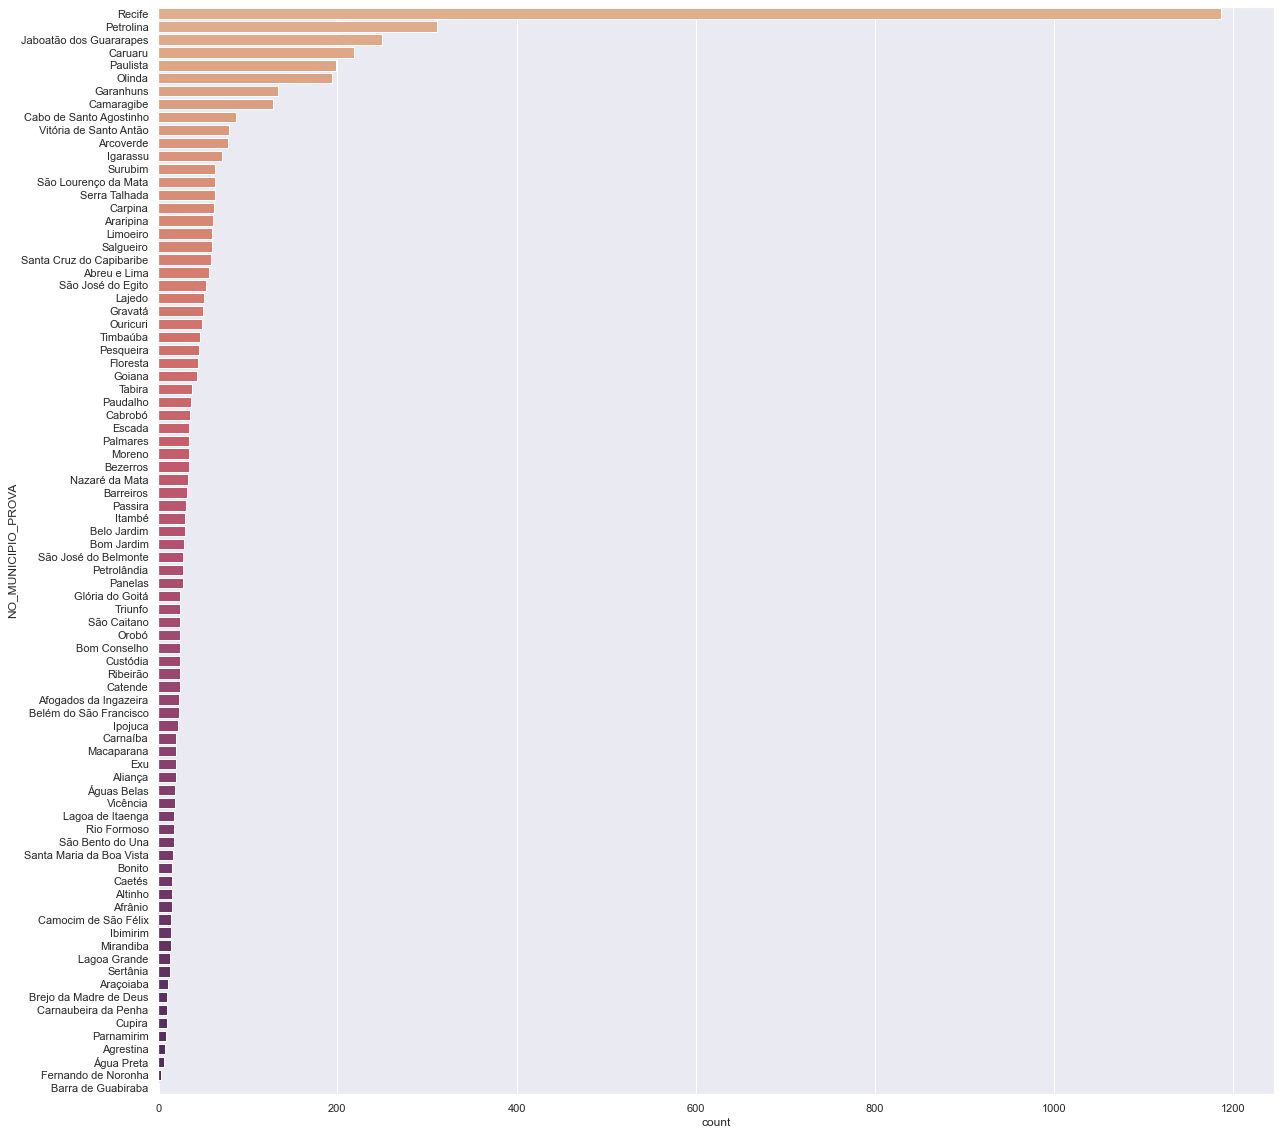

In [94]:
# Distribuicao dos municipios
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.countplot(y = 'NO_MUNICIPIO_PROVA',
                   data = df,
                   order = df['NO_MUNICIPIO_PROVA'].value_counts().index,
                   palette = 'flare');

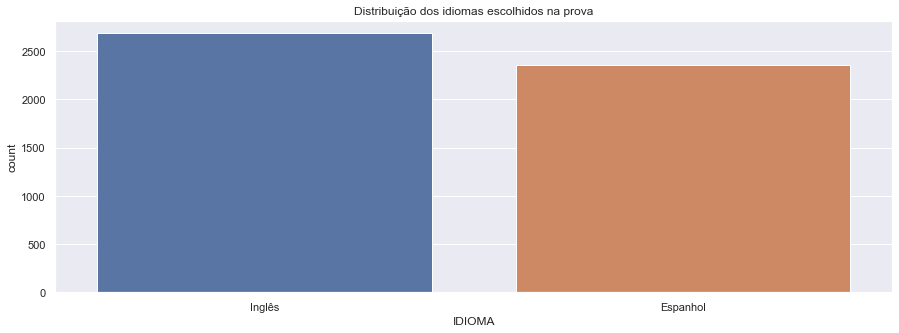

In [95]:
# Distribuicao dos idiomas escolhidos na prova
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = 'IDIOMA', data = df)
ax.set_title('Distribuição dos idiomas escolhidos na prova');

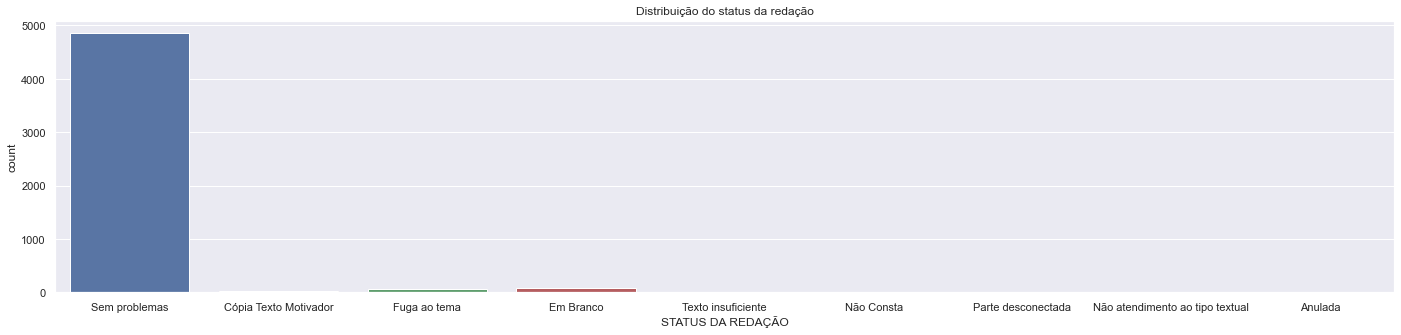

In [100]:
# Distribuicao do status da redacao
fig, ax = plt.subplots(figsize=(24,5))
ax = sns.countplot(x = 'STATUS DA REDAÇÃO', data = df)
ax.set_title('Distribuição do status da redação');

## Perguntas - Enem 2021

### 1. Qual a faixa etária que mais participou do Enem 2021?

In [13]:
print(df['FAIXA ETÁRIA'].value_counts().head())
print(df['FAIXA ETÁRIA'].value_counts(normalize=True).head()*100)

18 anos               1398
17 anos                998
19 anos                734
20 anos                450
Entre 26 e 30 anos     266
Name: FAIXA ETÁRIA, dtype: int64
18 anos               27.749107
17 anos               19.809448
19 anos               14.569274
20 anos                8.932116
Entre 26 e 30 anos     5.279873
Name: FAIXA ETÁRIA, dtype: float64


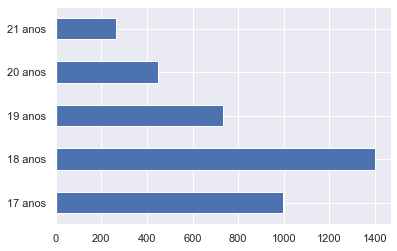

In [14]:
df['FAIXA ETÁRIA'].value_counts().sort_index().head().plot(kind='barh')
plt.show()

> A faixa etária que mais participou do Enem 2021 foi a de 17-19 anos, representando cerca de 62,1% da base de dados dos vestibulandos, tendo como destaque os inscritos de 18 anos de idade atingindo 27,74% da base de dados.

### 2. De quais cidades esses vestibulandos com idades de 17 a 19 anos são provenientes?

In [15]:
df_menor20 = df[df['FAIXA ETÁRIA'] < '20 anos']

In [16]:
df_menor20.groupby('NO_MUNICIPIO_PROVA')['FAIXA ETÁRIA'].value_counts().sort_values(ascending=False).head(10)

NO_MUNICIPIO_PROVA       FAIXA ETÁRIA
Recife                   18 anos         293
                         17 anos         211
                         19 anos         175
Petrolina                18 anos          73
Jaboatão dos Guararapes  18 anos          62
Caruaru                  18 anos          58
Jaboatão dos Guararapes  17 anos          58
Petrolina                19 anos          56
                         17 anos          54
Paulista                 18 anos          48
Name: FAIXA ETÁRIA, dtype: int64

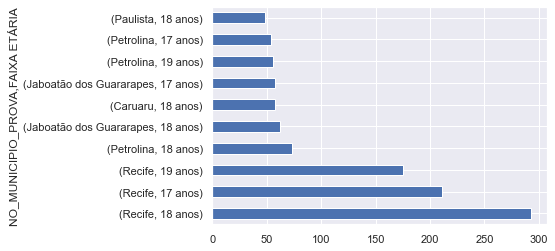

In [17]:
df_menor20.groupby('NO_MUNICIPIO_PROVA')['FAIXA ETÁRIA'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh')
plt.show()

> A grande parte dos jovens vestibulandos são da cidade do Recife.

### 3. Qual o tipo de escola que esses vestibulandos estudam?

In [18]:
print(df_menor20['TIPO DE ESCOLA'].value_counts())
print(df_menor20['TIPO DE ESCOLA'].value_counts(normalize=True)*100)

Público          1708
Não respondeu    1049
Privada           373
Name: TIPO DE ESCOLA, dtype: int64
Público          54.568690
Não respondeu    33.514377
Privada          11.916933
Name: TIPO DE ESCOLA, dtype: float64


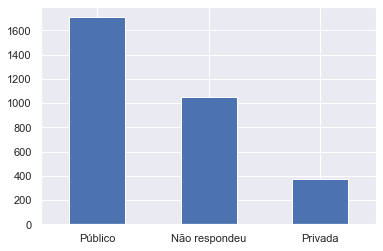

In [19]:
df_menor20['TIPO DE ESCOLA'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

> A maioria dos estudantes que possuem idade menor do que 20 anos e que participaram do Enem 2021, são da escola pública (54,56%). Uma quantidade considerável de estudantes não responderam ao formulário acerca do tipo de escola (33,51%) e 11,91% dos vestibulandos são de escola privada.

### 4. Qual a média das notas de matemática de acordo com a cor/raça?

In [20]:
df.groupby('COR/RAÇA')['NOTA_MT'].mean()

COR/RAÇA
Amarela          512.720747
Branca           552.462998
Indígena         479.699996
Não declarado    517.442800
Parda            512.681701
Preta            503.018835
Name: NOTA_MT, dtype: float64

In [21]:
df.groupby('COR/RAÇA')['NOTA_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
COR/RAÇA,,,,,,,,
Amarela,110.0,512.720747,105.107781,368.0,433.525,481.658456,595.750,840.2
Branca,1687.0,552.462998,116.145922,354.5,454.650,534.700000,642.250,895.1
Indígena,81.0,479.699996,88.643686,366.3,416.400,444.500000,542.100,747.0
Não declarado,114.0,517.442800,104.368897,357.6,442.400,479.750000,582.075,806.4
Parda,2466.0,512.681701,100.323186,356.3,432.825,489.850000,576.950,922.5
Preta,580.0,503.018835,94.891913,355.9,430.075,480.800000,566.650,953.1


#### Calculando o coeficiente de variação das notas de matemática por cor/raça

In [22]:
round((df.groupby('COR/RAÇA')['NOTA_MT'].std() / df.groupby('COR/RAÇA')['NOTA_MT'].mean()) * 100, 2)

COR/RAÇA
Amarela          20.50
Branca           21.02
Indígena         18.48
Não declarado    20.17
Parda            19.57
Preta            18.86
Name: NOTA_MT, dtype: float64

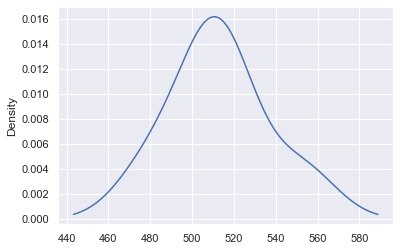

In [23]:
df.groupby('COR/RAÇA')['NOTA_MT'].mean().plot.density()
plt.show()

In [24]:
# Teste de normalidade da distribuicao das notas de matematicas por cor/raca
stats.shapiro(df.groupby('COR/RAÇA')['NOTA_MT'].mean())

ShapiroResult(statistic=0.9277167320251465, pvalue=0.5625887513160706)

> Através da análise gráfica e a confirmação pelo teste de normalidade de Shapiro-Wilk, pode-se dizer que as notas de matemática dos vestibulandos do Enem 2021 de acordo com a cor/raça tem uma tendência a seguir uma distribuição normal. Além disso, os coeficientes de variação indicam que não há muita heterogeneidade entre as notas baseadas na cor/raça do vestibulando.

### 5. Qual a média das notas de redação de acordo com a situação de conclusão do Ensino Médio?

In [25]:
df.groupby('SITUAÇÃO DE CONCLUSÃO')['NOTA_REDACAO'].mean()

SITUAÇÃO DE CONCLUSÃO
Estou cursando e concluirei o EM em 2021    596.348136
Já concluí o EM                             632.570544
Não concluí e não estou cursando o EM       612.500000
Name: NOTA_REDACAO, dtype: float64

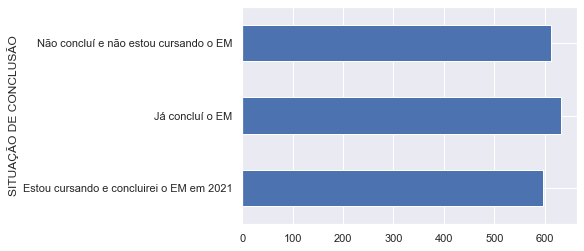

In [26]:
df.groupby('SITUAÇÃO DE CONCLUSÃO')['NOTA_REDACAO'].mean().plot(kind='barh')
plt.show()

> Pode-se observar que as médias das notas de redação entre os diferentes tipos de situação de conclusão não estão tão distintas.

### 6. Qual a faixa etária mais comum nos vestibulandos que ja concluíram o Ensino Médio?

In [27]:
df[df['SITUAÇÃO DE CONCLUSÃO'] == 'Já concluí o EM'].groupby('SITUAÇÃO DE CONCLUSÃO')['FAIXA ETÁRIA'].value_counts().sort_index()

SITUAÇÃO DE CONCLUSÃO  FAIXA ETÁRIA      
Já concluí o EM        17 anos                49
                       18 anos               439
                       19 anos               560
                       20 anos               410
                       21 anos               255
                       22 anos               176
                       23 anos               121
                       24 anos                95
                       25 anos                82
                       Entre 26 e 30 anos    264
                       Entre 31 e 35 anos    116
                       Entre 36 e 40 anos     95
                       Entre 41 e 45 anos     61
                       Entre 46 e 50 anos     43
                       Entre 51 e 55 anos     20
                       Entre 56 e 60 anos     11
                       Entre 61 e 65 anos      4
                       Entre 66 e 70 anos      4
                       Menor de 17 anos        1
Name: FAIXA ETÁRIA, dtype: 

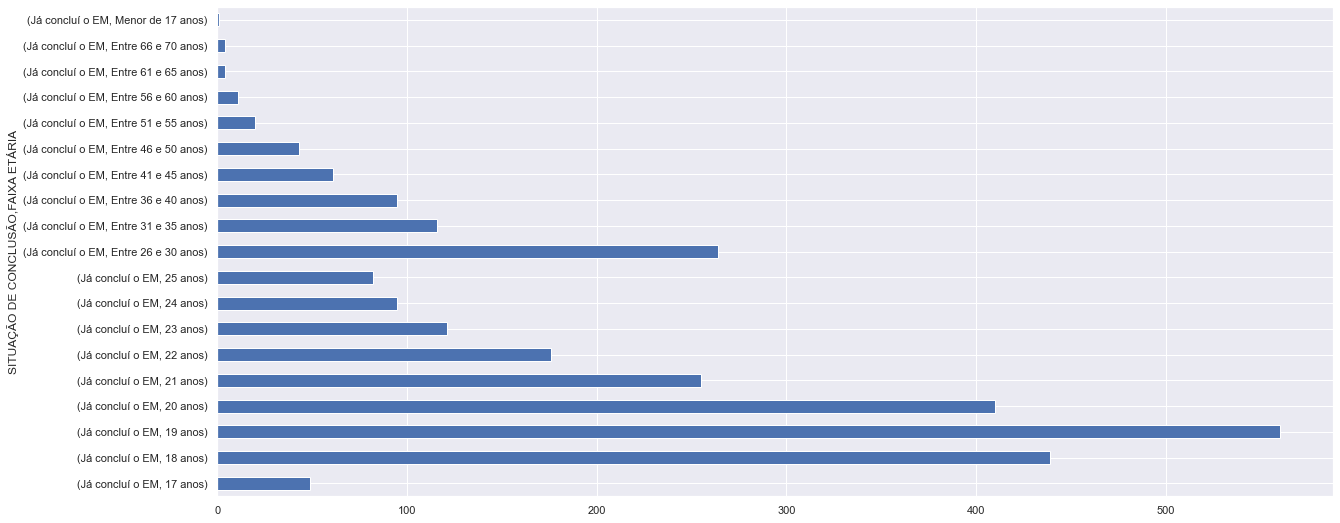

In [28]:
fig, ax = plt.subplots(figsize=(20,9))
df[df['SITUAÇÃO DE CONCLUSÃO'] == 'Já concluí o EM'].groupby('SITUAÇÃO DE CONCLUSÃO')['FAIXA ETÁRIA'].value_counts().sort_index().plot(kind='barh')
plt.show()